In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading Library

In [63]:
df_tr=pd.read_csv(r'C:\Users\Ankita\Desktop\Data_Train.csv')
df_te=pd.read_csv(r'C:\Users\Ankita\Desktop\Test_set.csv')
df_s=pd.read_csv(r'C:\Users\Ankita\Desktop\Sample_submission.csv')

EDA

In [64]:
df_tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Loading the data First 5 rows of train dataset

In [65]:
df_te.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Loading the data First 5 rows of test dataset

In [2042]:
df_s.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


Loading the data First 5 rows of sample dataset

In [2043]:
df_tr.shape

(10683, 11)

there 10683 rows 11 columns in train dataset

In [66]:
df_te.shape

(2671, 10)

there 2671 rows 10 columns in test dataset

In [2045]:
df_s.shape

(2671, 1)

there 2671 rows 1 columns in sample dataset

In [2046]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Describe dataset information in train dataset

In [2047]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Describe dataset information in test dataset

In [2048]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   2671 non-null   int64
dtypes: int64(1)
memory usage: 21.0 KB


In [2049]:
df_tr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 columns null values are present in train dataset.

In [2050]:
df_te.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values are present in test dataset.

In [2051]:
df_s.isnull().sum()

Price    0
dtype: int64

There are no null values are present in sample dataset.

In [2052]:
df_tr.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Describe dataset columns in train dataset

In [2053]:
df_te.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

Describe dataset columns in test dataset

In [2054]:
df_s.columns

Index(['Price'], dtype='object')

Describe dataset columns in sample dataset

In [2055]:
df_tr.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Describe the datatypes of all the column in train dataset

In [4]:
df_te.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

Describe the datatypes of all the column in test dataset

In [2057]:
df_tr.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Describe the train dataset

In [67]:
df_te.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


Describe the test dataset

In [2059]:
df_tr.dropna(inplace=True)


In [2060]:
df_tr[df_tr.duplicated()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [2061]:
df_tr.drop_duplicates(keep='first',inplace=True)

In [68]:
df_te.dropna(inplace=True)

In [69]:
df_te[df_tr.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
683,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,19:00 28 Jun,29h 35m,2 stops,In-flight meal not included
1061,IndiGo,6/05/2019,Mumbai,Hyderabad,BOM → HYD,16:55,18:25,1h 30m,non-stop,No info
1348,Jet Airways,1/04/2019,Kolkata,Banglore,CCU → DEL → BLR,09:35,22:05,12h 30m,1 stop,No info
1418,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,11:40,19:10,7h 30m,1 stop,No info
1674,IndiGo,21/06/2019,Kolkata,Banglore,CCU → BLR,15:30,18:05,2h 35m,non-stop,No info
1685,GoAir,21/05/2019,Delhi,Cochin,DEL → BOM → COK,14:25,19:35,5h 10m,1 stop,No info
1704,IndiGo,3/06/2019,Delhi,Cochin,DEL → BOM → COK,09:15,01:30 04 Jun,16h 15m,1 stop,No info
1807,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,08:15 10 May,25h 45m,1 stop,In-flight meal not included
1891,Air India,9/06/2019,Kolkata,Banglore,CCU → DEL → VGA → BLR,10:00,10:00 10 Jun,24h,2 stops,No info
1971,IndiGo,6/03/2019,Mumbai,Hyderabad,BOM → GOI → HYD,11:15,16:05,4h 50m,1 stop,No info


In [70]:
df_te.drop_duplicates(keep='first',inplace=True)

Drop duplicate values in train dataset

In [2062]:
df_tr["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Value counts of Additional_Info column

In [2063]:
df_tr["Additional_Info"] = df_tr["Additional_Info"].replace({'No Info': 'No info'})

Replace value of Additional_Info column

In [2064]:
df_tr["Journey_Month"] = pd.to_datetime(df_tr["Date_of_Journey"],format = "%d/%m/%Y").dt.month
df_tr["Journey_Day"] = pd.to_datetime(df_tr["Date_of_Journey"],format="%d/%m/%Y").dt.day
df_tr.drop(["Date_of_Journey"],axis=1,inplace=True)


Create Journy month column from Date_of_journey column and drop that column

In [2065]:
df_tr['Duration']=  df_tr['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [71]:
df_te['Duration']=  df_te['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

Replacing values od Duration column from train and test dataset

In [2067]:
df_tr['Dep_hour'] = pd.to_datetime(df_tr["Dep_Time"]).dt.hour
df_tr['Dep_min'] = pd.to_datetime(df_tr["Dep_Time"]).dt.minute
df_tr.drop(['Dep_Time'],axis=1,inplace=True)

Create dep_hour and Dep_min column from Dep_Time and drop that column

In [2068]:
df_tr["Arrival_hour"] = pd.to_datetime(df_tr['Arrival_Time']).dt.hour
df_tr["Arrival_min"] = pd.to_datetime(df_tr['Arrival_Time']).dt.minute
df_tr.drop(["Arrival_Time"],axis=1,inplace=True)

Create Arrival_hour and Arrival_min column from Arrival_Time column and drop that column.

In [72]:
df_te["Journey_Month"] = pd.to_datetime(df_te["Date_of_Journey"],format = "%d/%m/%Y").dt.month
df_te["Journey_Day"] = pd.to_datetime(df_te["Date_of_Journey"],format="%d/%m/%Y").dt.day
df_te.drop(["Date_of_Journey"],axis=1,inplace=True)

Create Journy month column from Date_of_journey column and drop that column in test dataset

In [73]:
df_te['Dep_hour'] = pd.to_datetime(df_te["Dep_Time"]).dt.hour
df_te['Dep_min'] = pd.to_datetime(df_te["Dep_Time"]).dt.minute
df_te.drop(['Dep_Time'],axis=1,inplace=True)

Create dep_hour and Dep_min column from Dep_Time and drop that column from test dataset

In [74]:
df_te["Arrival_hour"] = pd.to_datetime(df_te['Arrival_Time']).dt.hour
df_te["Arrival_min"] = pd.to_datetime(df_te['Arrival_Time']).dt.minute
df_te.drop(["Arrival_Time"],axis=1,inplace=True)

Create Arrival_hour and Arrival_min column from Arrival_Time column and drop that column from test dataset

In [2072]:
df_tr.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


Univarient Analysis of Train dataset:

Distribution of the columns:

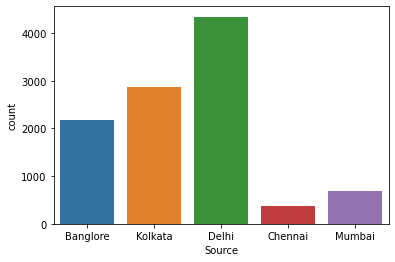

In [1985]:
#plt.figure(figsize=(25,8))
sns.countplot(df_tr['Source']);

Distribution of the source column

<AxesSubplot:xlabel='Airline', ylabel='count'>

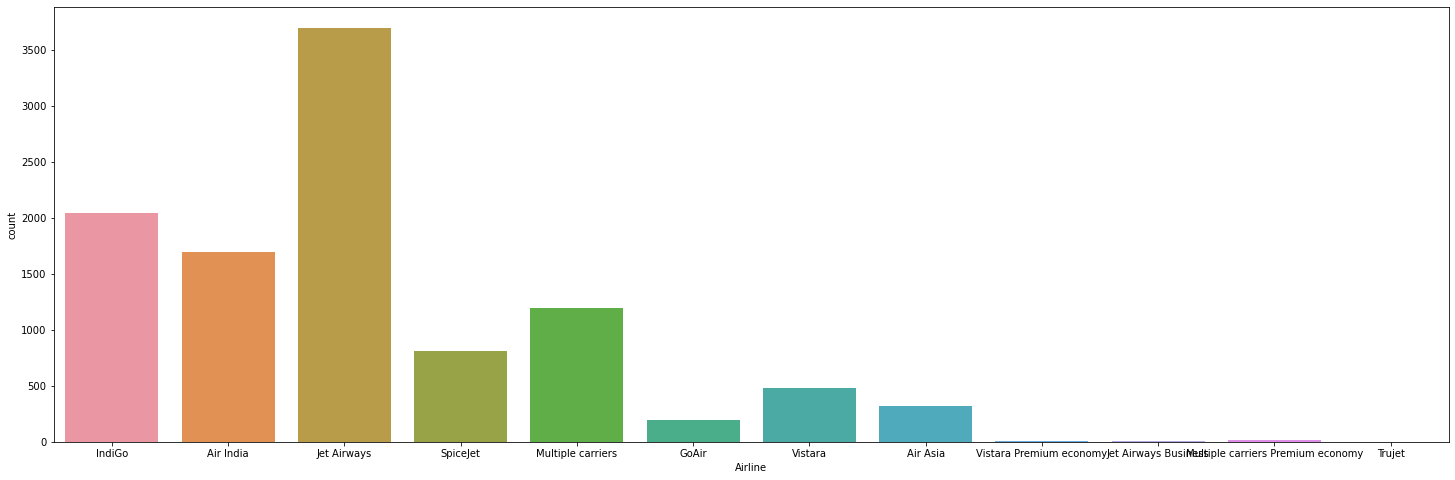

In [1988]:
plt.figure(figsize=(25,8))
sns.countplot(df_tr['Airline'])

Distribution of Airline columns

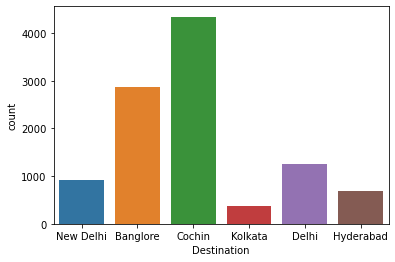

In [1987]:
#plt.figure(figsize=(25,8))
sns.countplot(df_tr['Destination']);

Distribution of the Destination columns

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

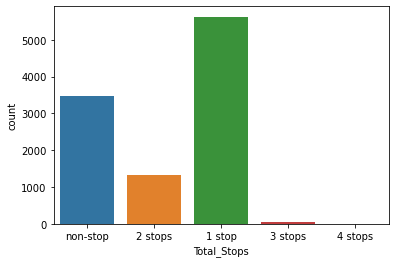

In [1992]:
sns.countplot(df_tr['Total_Stops'])

Distribution of the Total_Stops columns

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

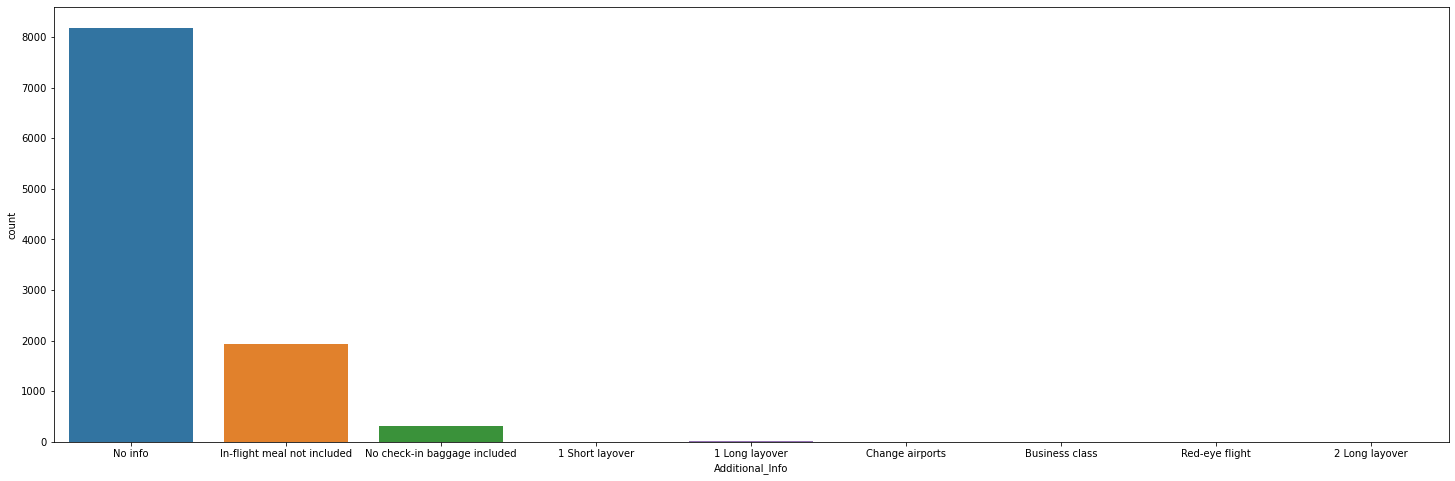

In [1997]:
plt.figure(figsize=(25,8))
sns.countplot(df_tr['Additional_Info'])

Distribution of the Additional_Info columns

<AxesSubplot:xlabel='Duration', ylabel='Density'>

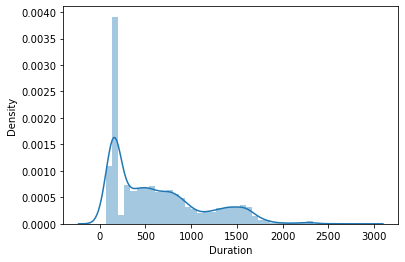

In [1999]:
sns.distplot(df_tr["Duration"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

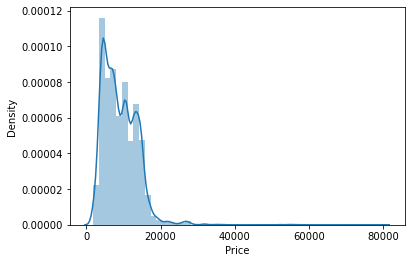

In [2000]:
sns.distplot(df_tr["Price"])

<AxesSubplot:xlabel='Journey_Month', ylabel='Density'>

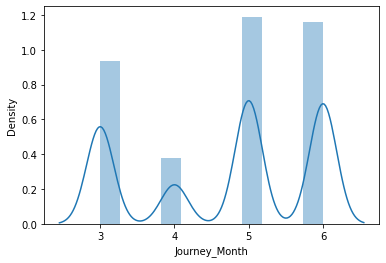

In [2001]:
sns.distplot(df_tr["Journey_Month"])

<AxesSubplot:xlabel='Journey_Day', ylabel='Density'>

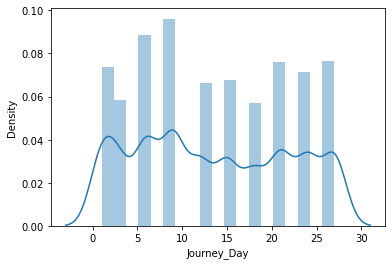

In [2002]:
sns.distplot(df_tr["Journey_Day"])

<AxesSubplot:xlabel='Dep_hour', ylabel='Density'>

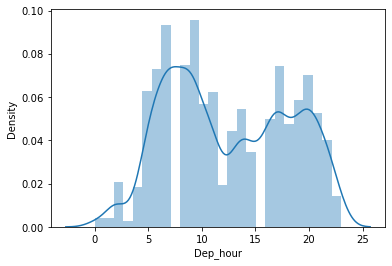

In [2003]:
sns.distplot(df_tr["Dep_hour"])

<AxesSubplot:xlabel='Dep_min', ylabel='Density'>

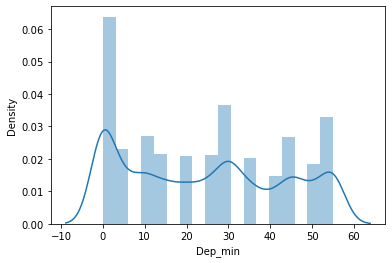

In [2004]:
sns.distplot(df_tr["Dep_min"])

<AxesSubplot:xlabel='Arrival_hour', ylabel='Density'>

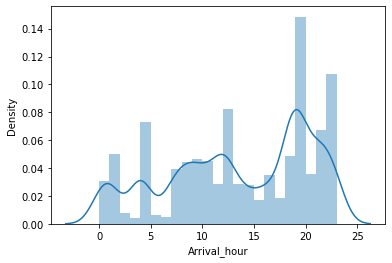

In [2005]:
sns.distplot(df_tr["Arrival_hour"])

<AxesSubplot:xlabel='Arrival_min', ylabel='Density'>

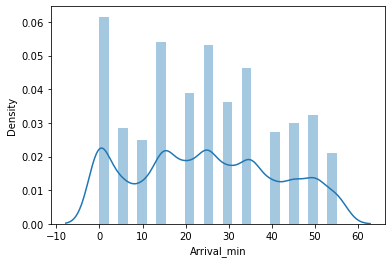

In [2006]:
sns.distplot(df_tr["Arrival_min"])

Here some columns data is normally distributed and some columns data is not normally distributed in Train dataset

Checking Outliers:

<AxesSubplot:xlabel='Duration'>

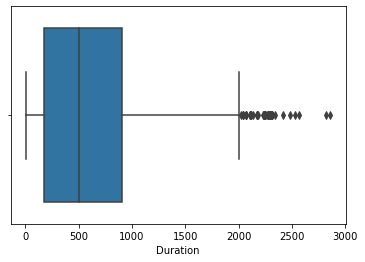

In [2009]:
sns.boxplot(df_tr["Duration"])

<AxesSubplot:xlabel='Journey_Month'>

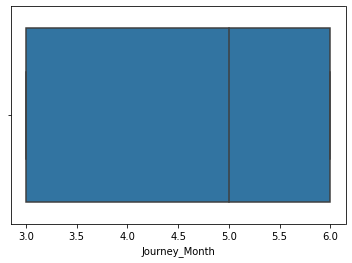

In [2011]:
sns.boxplot(df_tr["Journey_Month"])

<AxesSubplot:xlabel='Journey_Day'>

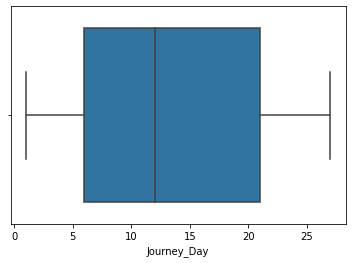

In [2012]:
sns.boxplot(df_tr["Journey_Day"])

<AxesSubplot:xlabel='Dep_hour'>

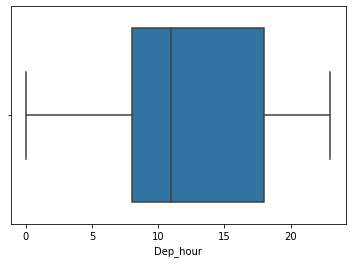

In [2013]:
sns.boxplot(df_tr["Dep_hour"])

<AxesSubplot:xlabel='Dep_min'>

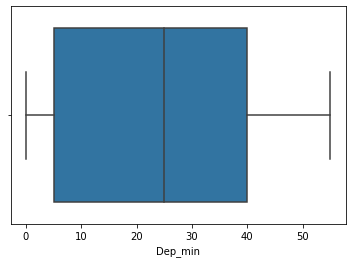

In [2014]:
sns.boxplot(df_tr["Dep_min"])

<AxesSubplot:xlabel='Arrival_hour'>

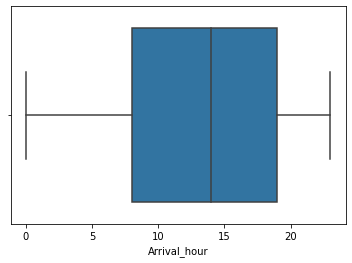

In [2015]:
sns.boxplot(df_tr["Arrival_hour"])

<AxesSubplot:xlabel='Arrival_min'>

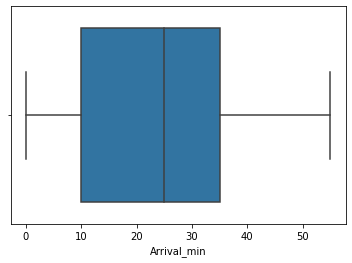

In [2016]:
sns.boxplot(df_tr["Arrival_min"])

here Duration column outlier was present

Bi varient Analysis:

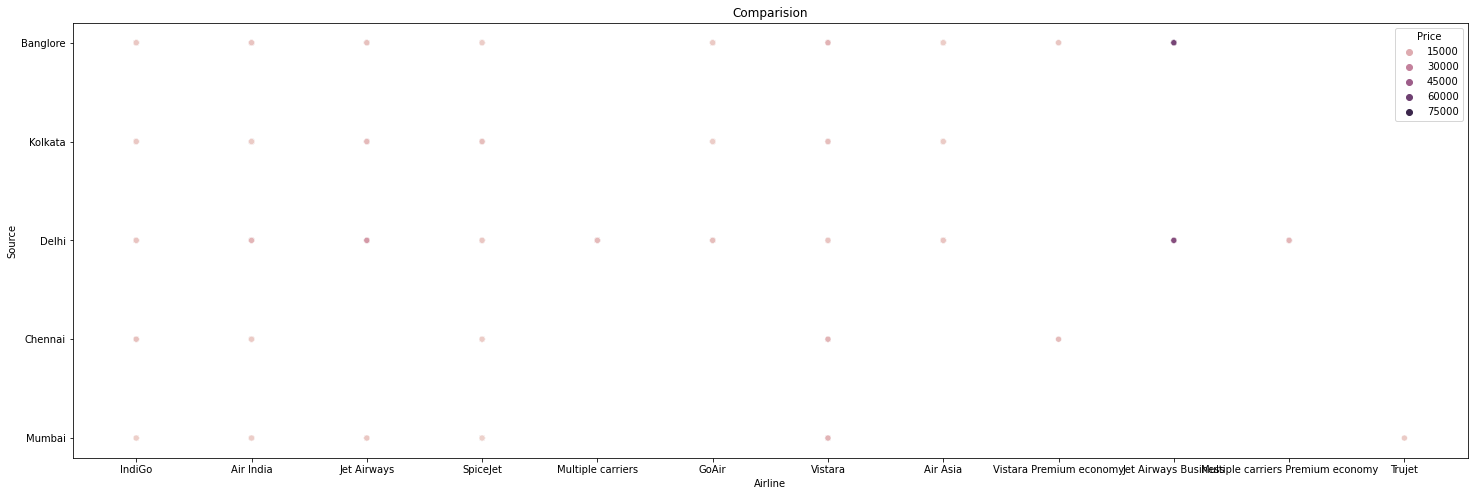

In [2019]:
plt.figure(figsize=[25,8])
plt.title('Comparision')
sns.scatterplot(df_tr["Airline"],df_tr["Source"],hue=df_tr["Price"])
plt.show()

Comparision between 2 columns using Scatterplot.

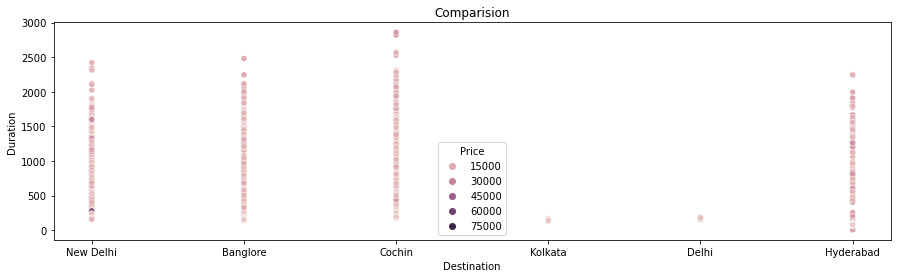

In [2037]:
plt.figure(figsize=[25,8])
plt.title('Comparision')
sns.scatterplot(df_tr["Duration"],df_tr["Destination"],hue=df_tr["Price"])
plt.show()

Comparision between 2 columns using Scatterplot.

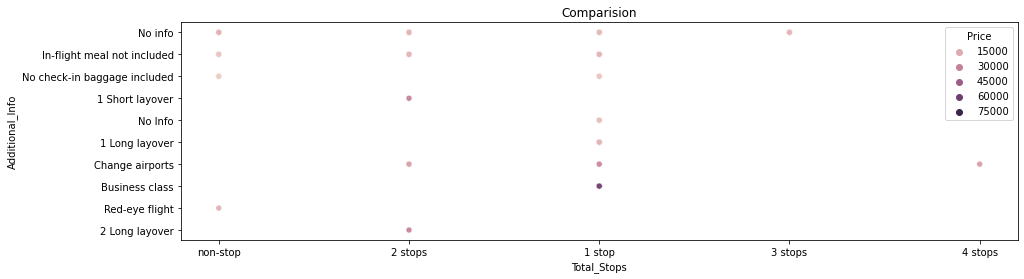

In [53]:
plt.figure(figsize=[15,4])
plt.title('Comparision')
sns.scatterplot(df_tr["Total_Stops"],df_tr["Additional_Info"],hue=df_tr["Price"])
plt.show()

Comparision between 2 columns using Scatterplot.

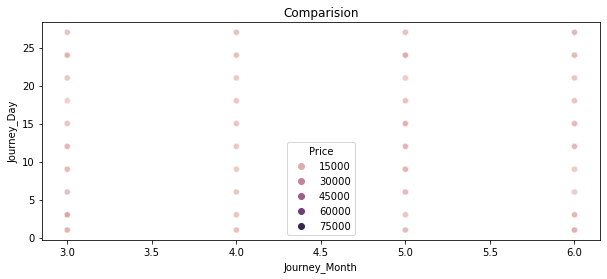

In [2027]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_tr["Journey_Month"],df_tr["Journey_Day"],hue=df_tr["Price"])
plt.show()

Comparision between 2 columns using Scatterplot.

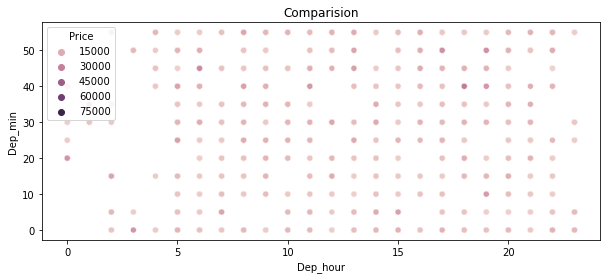

In [2028]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_tr["Dep_hour"],df_tr["Dep_min"],hue=df_tr["Price"])
plt.show()

Comparision between 2 columns using Scatterplot.

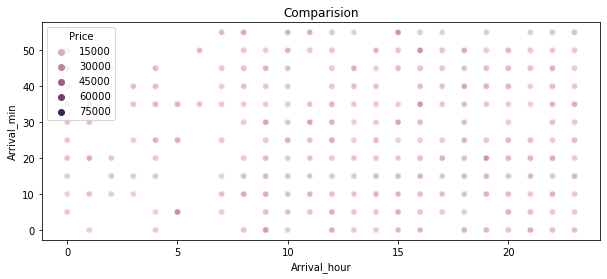

In [2029]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_tr["Arrival_hour"],df_tr["Arrival_min"],hue=df_tr["Price"])
plt.show()

Comparision between 2 columns using Scatterplot.

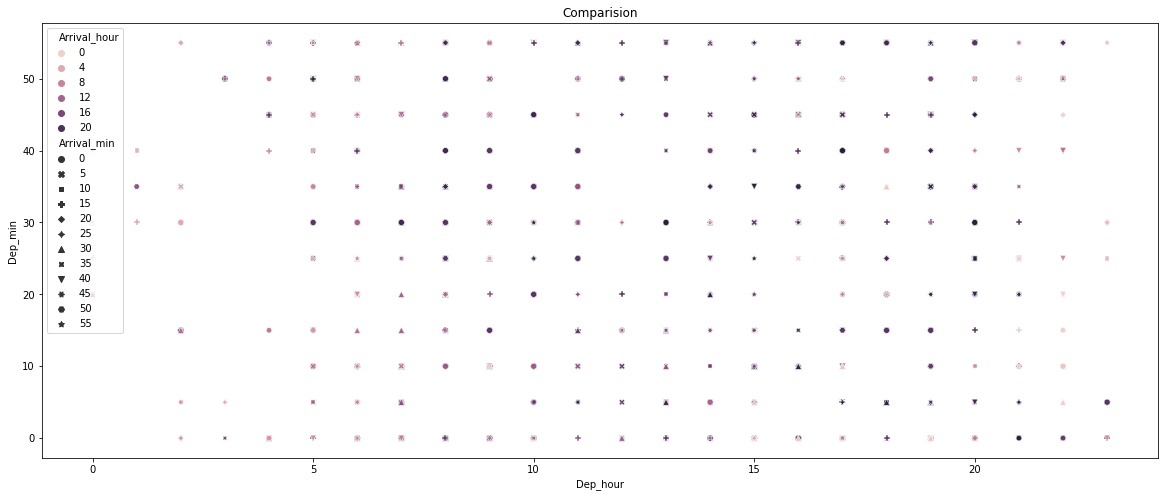

In [2032]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_tr["Arrival_hour"],df_tr["Arrival_min"],df_tr['Dep_hour'],df_tr['Dep_min'],hue=df_tr["Price"])
plt.show()

Comparision between 4 columns using Scatterplot.

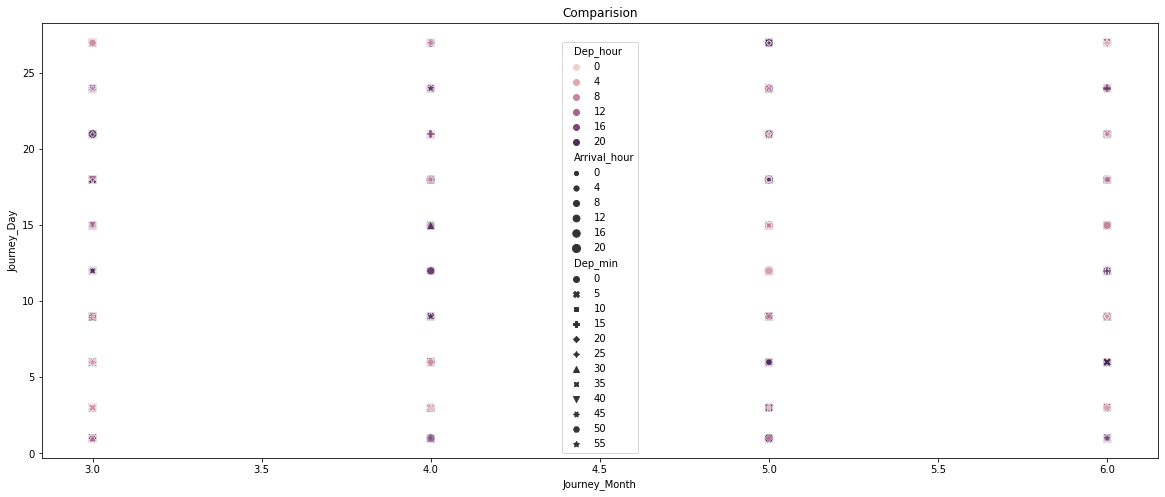

In [2033]:
plt.figure(figsize=[20,8])
plt.title('Comparision')
sns.scatterplot(df_tr["Journey_Month"],df_tr["Journey_Day"],df_tr["Dep_hour"],df_tr["Dep_min"],df_tr["Arrival_hour"],df_tr["Arrival_min"],hue=df_tr["Price"])
plt.show()

Comparision between 4 columns using Scatterplot.

Univarient analysis of Test dataset:

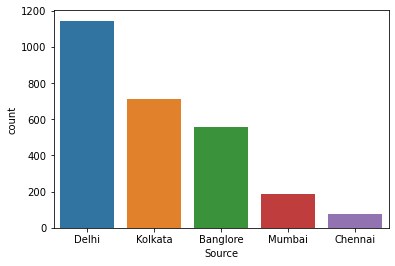

In [27]:
sns.countplot(df_te['Source']);

<AxesSubplot:xlabel='Airline', ylabel='count'>

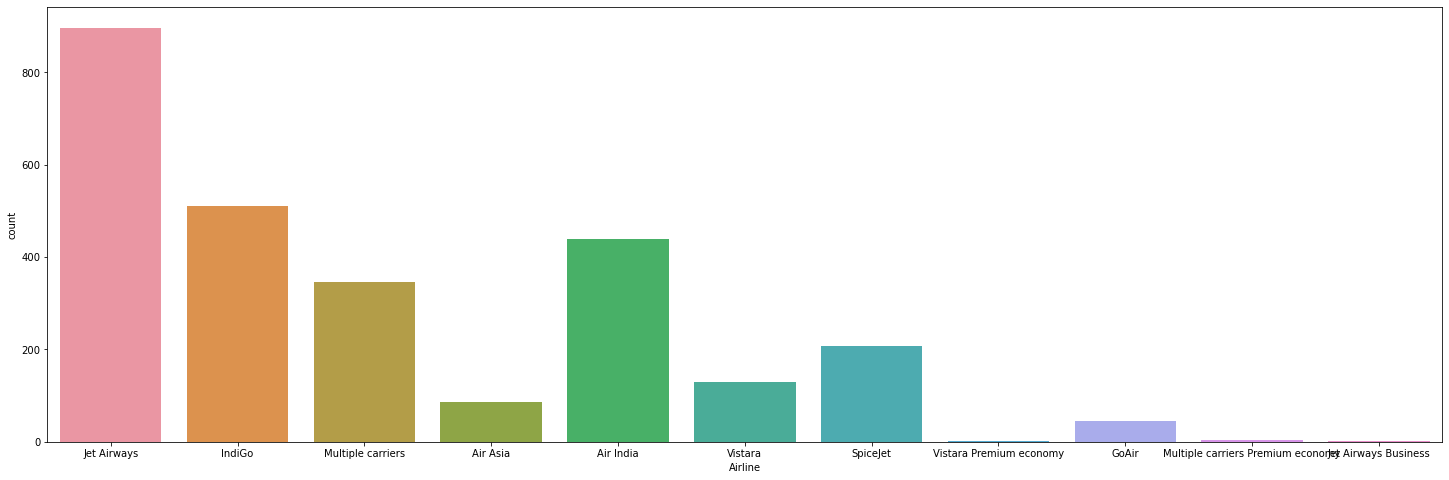

In [28]:
plt.figure(figsize=(25,8))
sns.countplot(df_te['Airline'])

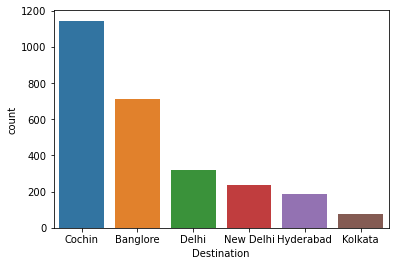

In [29]:
sns.countplot(df_te['Destination']);

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

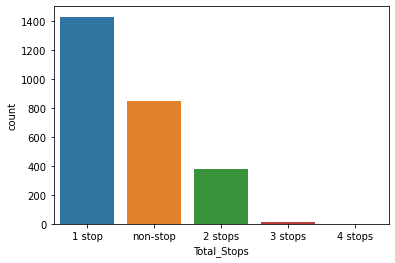

In [30]:
sns.countplot(df_te['Total_Stops'])

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

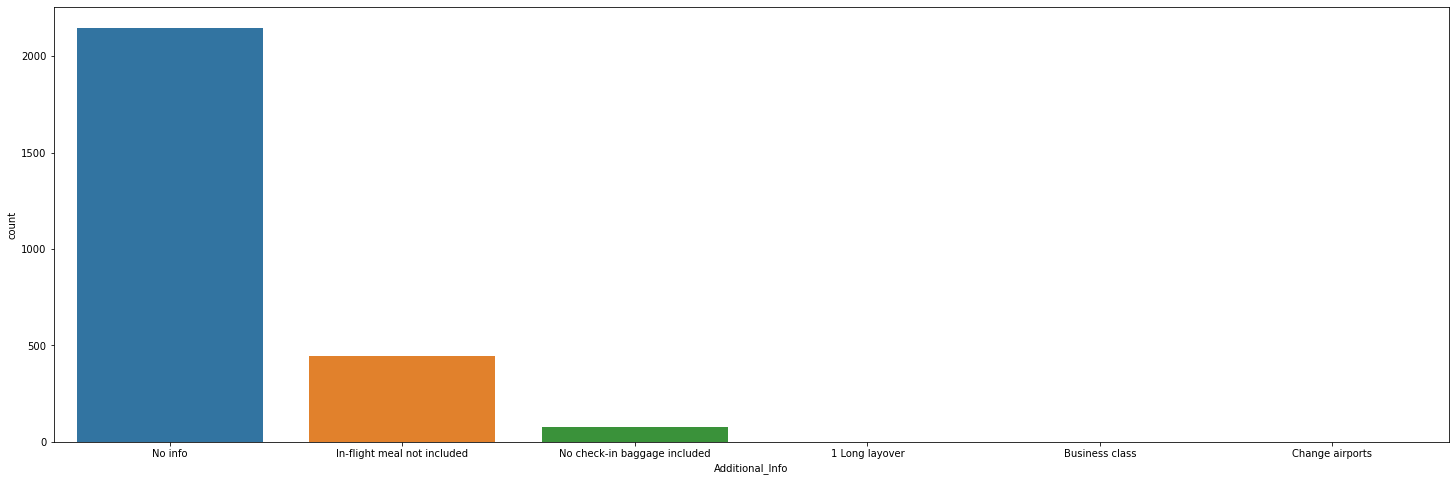

In [31]:
plt.figure(figsize=(25,8))
sns.countplot(df_te['Additional_Info'])

Checking Distribution:

<AxesSubplot:xlabel='Duration', ylabel='Density'>

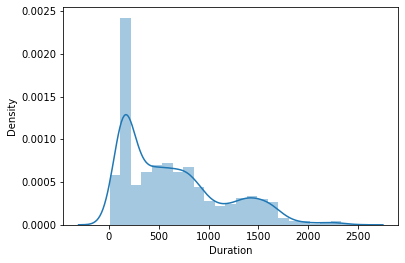

In [32]:
sns.distplot(df_te["Duration"])

<AxesSubplot:xlabel='Journey_Month', ylabel='Density'>

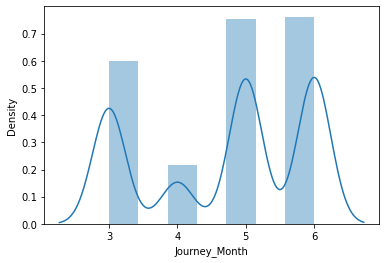

In [33]:
sns.distplot(df_te["Journey_Month"])

<AxesSubplot:xlabel='Journey_Day', ylabel='Density'>

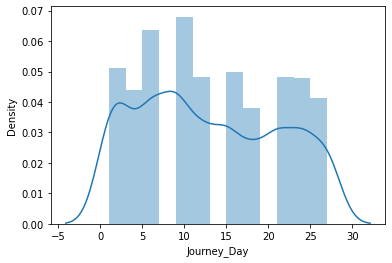

In [34]:
sns.distplot(df_te["Journey_Day"])

<AxesSubplot:xlabel='Dep_hour', ylabel='Density'>

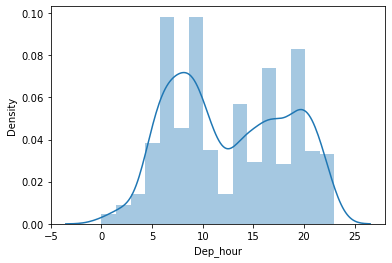

In [35]:
sns.distplot(df_te["Dep_hour"])

<AxesSubplot:xlabel='Dep_min', ylabel='Density'>

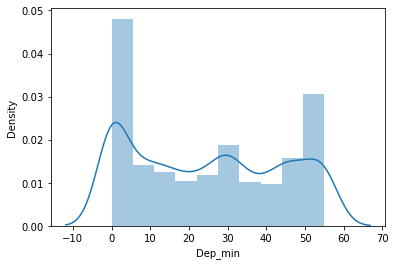

In [36]:
sns.distplot(df_te["Dep_min"])

<AxesSubplot:xlabel='Arrival_hour', ylabel='Density'>

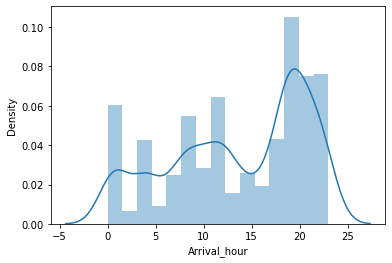

In [37]:
sns.distplot(df_te["Arrival_hour"])

<AxesSubplot:xlabel='Arrival_min', ylabel='Density'>

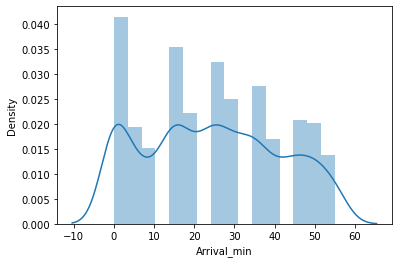

In [38]:
sns.distplot(df_te["Arrival_min"])

Here some columns data is normally distributed and some columns data is not normally distributed in Test dataset

Checking Outliers od Test dataset:

<AxesSubplot:xlabel='Duration'>

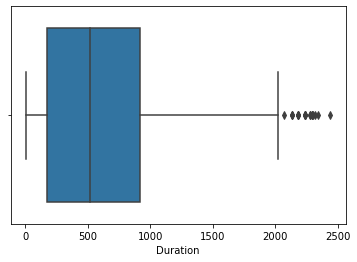

In [39]:
sns.boxplot(df_te["Duration"])

<AxesSubplot:xlabel='Journey_Month'>

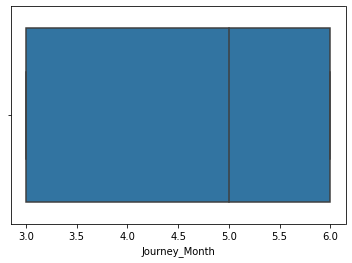

In [40]:
sns.boxplot(df_te["Journey_Month"])

<AxesSubplot:xlabel='Journey_Day'>

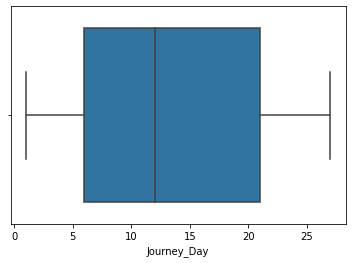

In [41]:
sns.boxplot(df_te["Journey_Day"])

<AxesSubplot:xlabel='Dep_hour'>

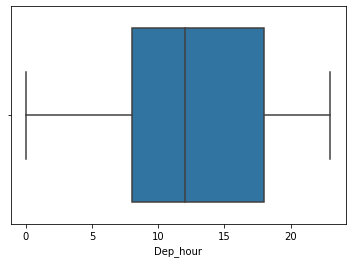

In [42]:
sns.boxplot(df_te["Dep_hour"])

<AxesSubplot:xlabel='Dep_min'>

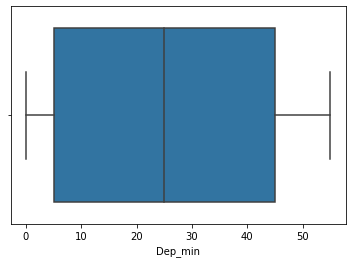

In [43]:
sns.boxplot(df_te["Dep_min"])

<AxesSubplot:xlabel='Arrival_hour'>

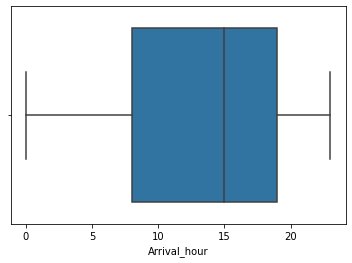

In [44]:
sns.boxplot(df_te["Arrival_hour"])

<AxesSubplot:xlabel='Arrival_min'>

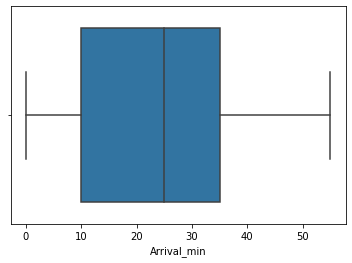

In [45]:
sns.boxplot(df_te["Arrival_min"])

here Duration column outlier was present in Test dataset

Bi varient Analysis od Test dataset:

Target column not present Test dataset

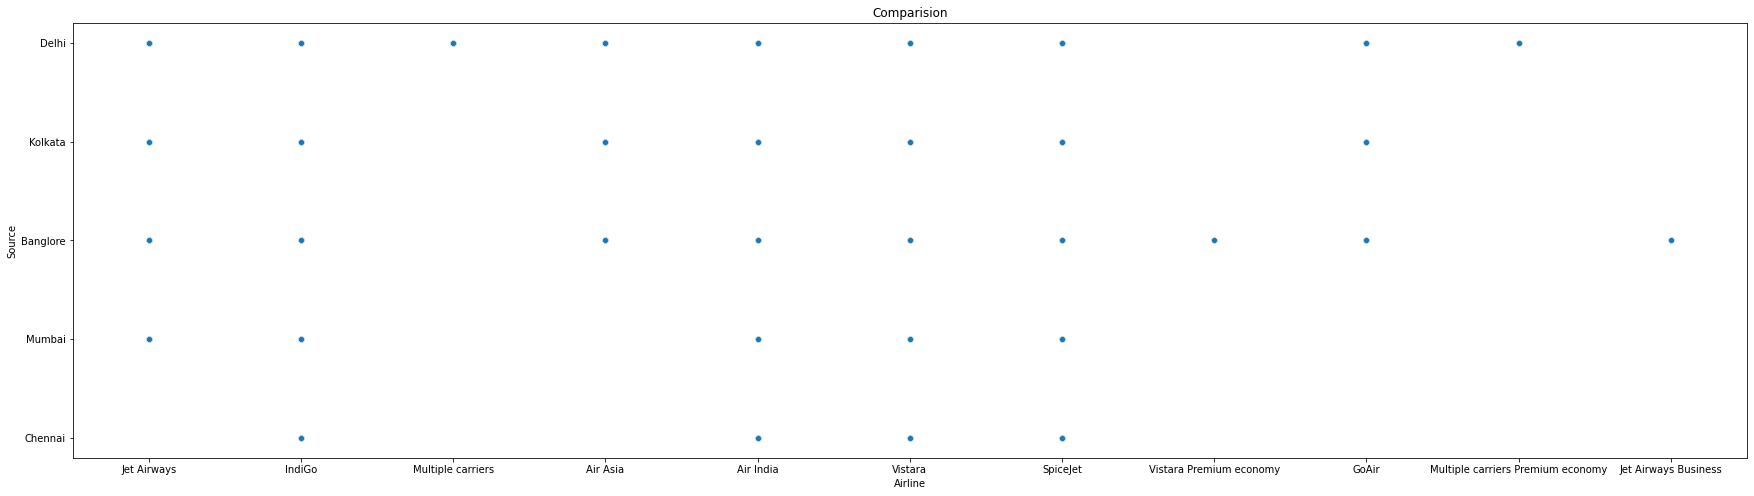

In [51]:
plt.figure(figsize=[30,8])
plt.title('Comparision')
sns.scatterplot(df_te['Airline'],df_te['Source']);

Comparision between 2 columns using Scatterplot.

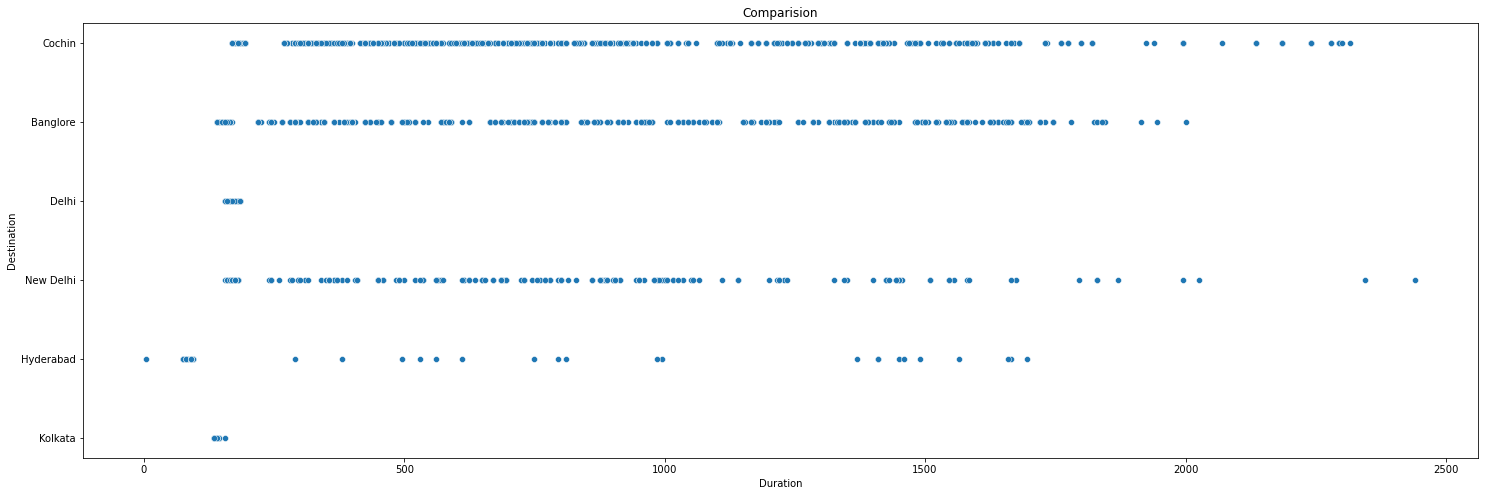

In [52]:
plt.figure(figsize=[25,8])
plt.title('Comparision')
sns.scatterplot(df_te["Duration"],df_te["Destination"]);

Comparision between 2 columns using Scatterplot.

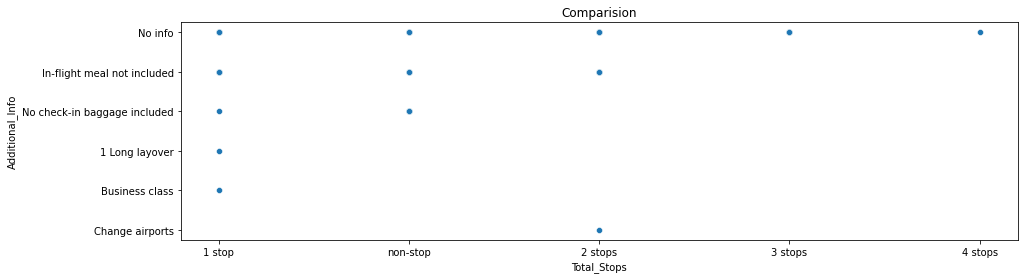

In [54]:
plt.figure(figsize=[15,4])
plt.title('Comparision')
sns.scatterplot(df_te["Total_Stops"],df_te["Additional_Info"])
plt.show()

Comparision between 2 columns using Scatterplot.

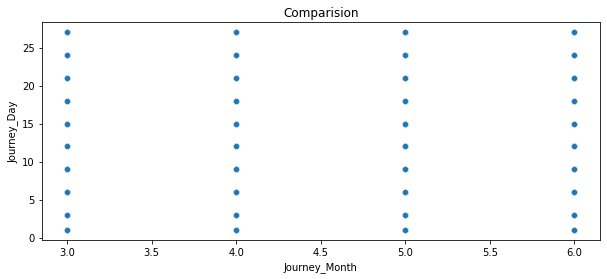

In [55]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_te["Journey_Month"],df_te["Journey_Day"])
plt.show()

Comparision between 2 columns using Scatterplot.

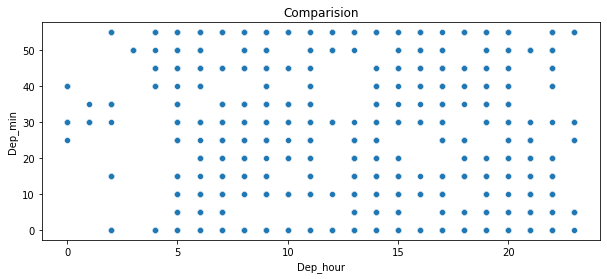

In [56]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_te["Dep_hour"],df_te["Dep_min"])
plt.show()

Comparision between 2 columns using Scatterplot.

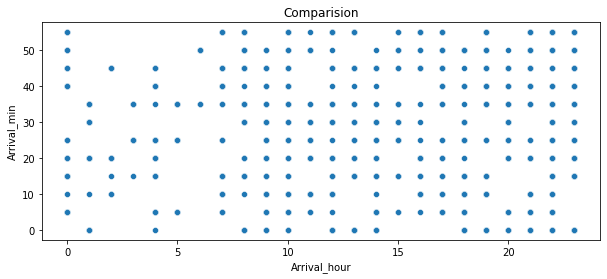

In [57]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_te["Arrival_hour"],df_te["Arrival_min"])
plt.show()

Comparision between 2 columns using Scatterplot.

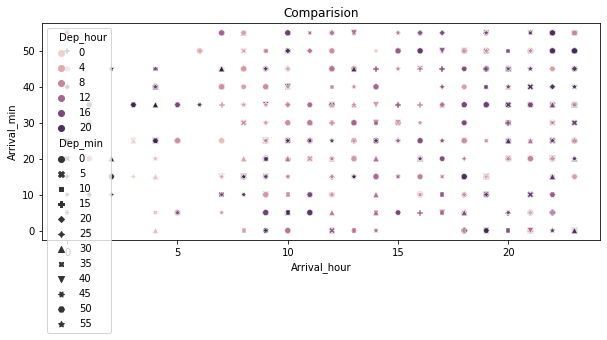

In [58]:
plt.figure(figsize=[10,4])
plt.title('Comparision')
sns.scatterplot(df_te["Arrival_hour"],df_te["Arrival_min"],df_te['Dep_hour'],df_te['Dep_min'])
plt.show()

Comparision between 4 columns using Scatterplot.

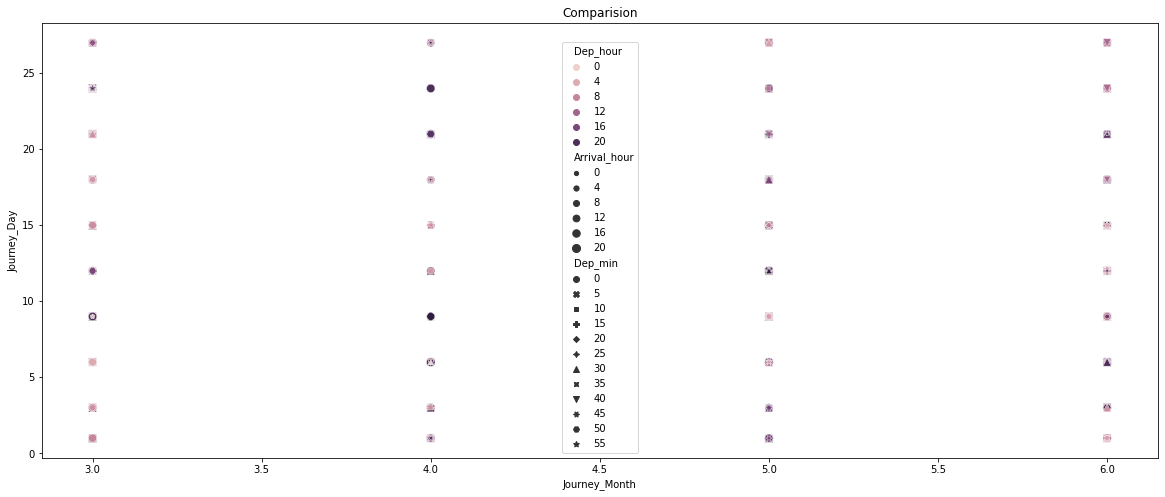

In [59]:
plt.figure(figsize=[20,8])
plt.title('Comparision')
sns.scatterplot(df_te["Journey_Month"],df_te["Journey_Day"],df_te["Dep_hour"],df_te["Dep_min"],df_te["Arrival_hour"],df_te["Arrival_min"])
plt.show()

Comparision between 4 columns using Scatterplot.

Multi Varient Analysis of Train Dataset:

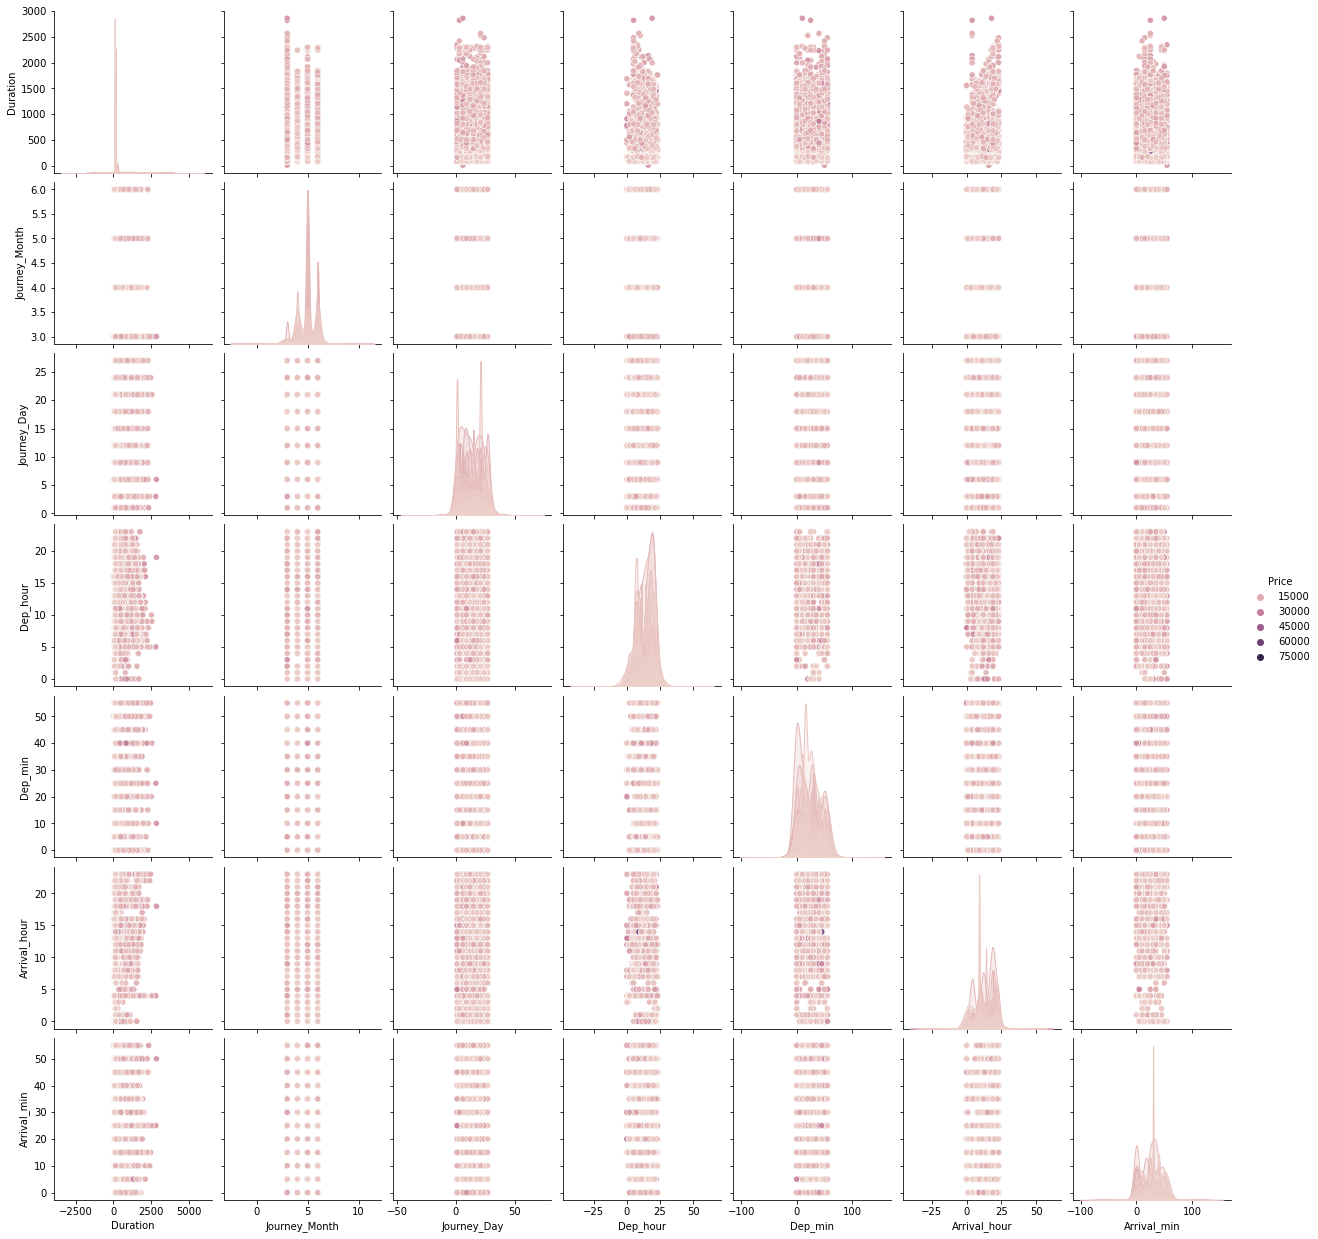

In [2073]:
sns.pairplot(df_tr, hue='Price')

Multi Varient Analysis of Test Dataset:

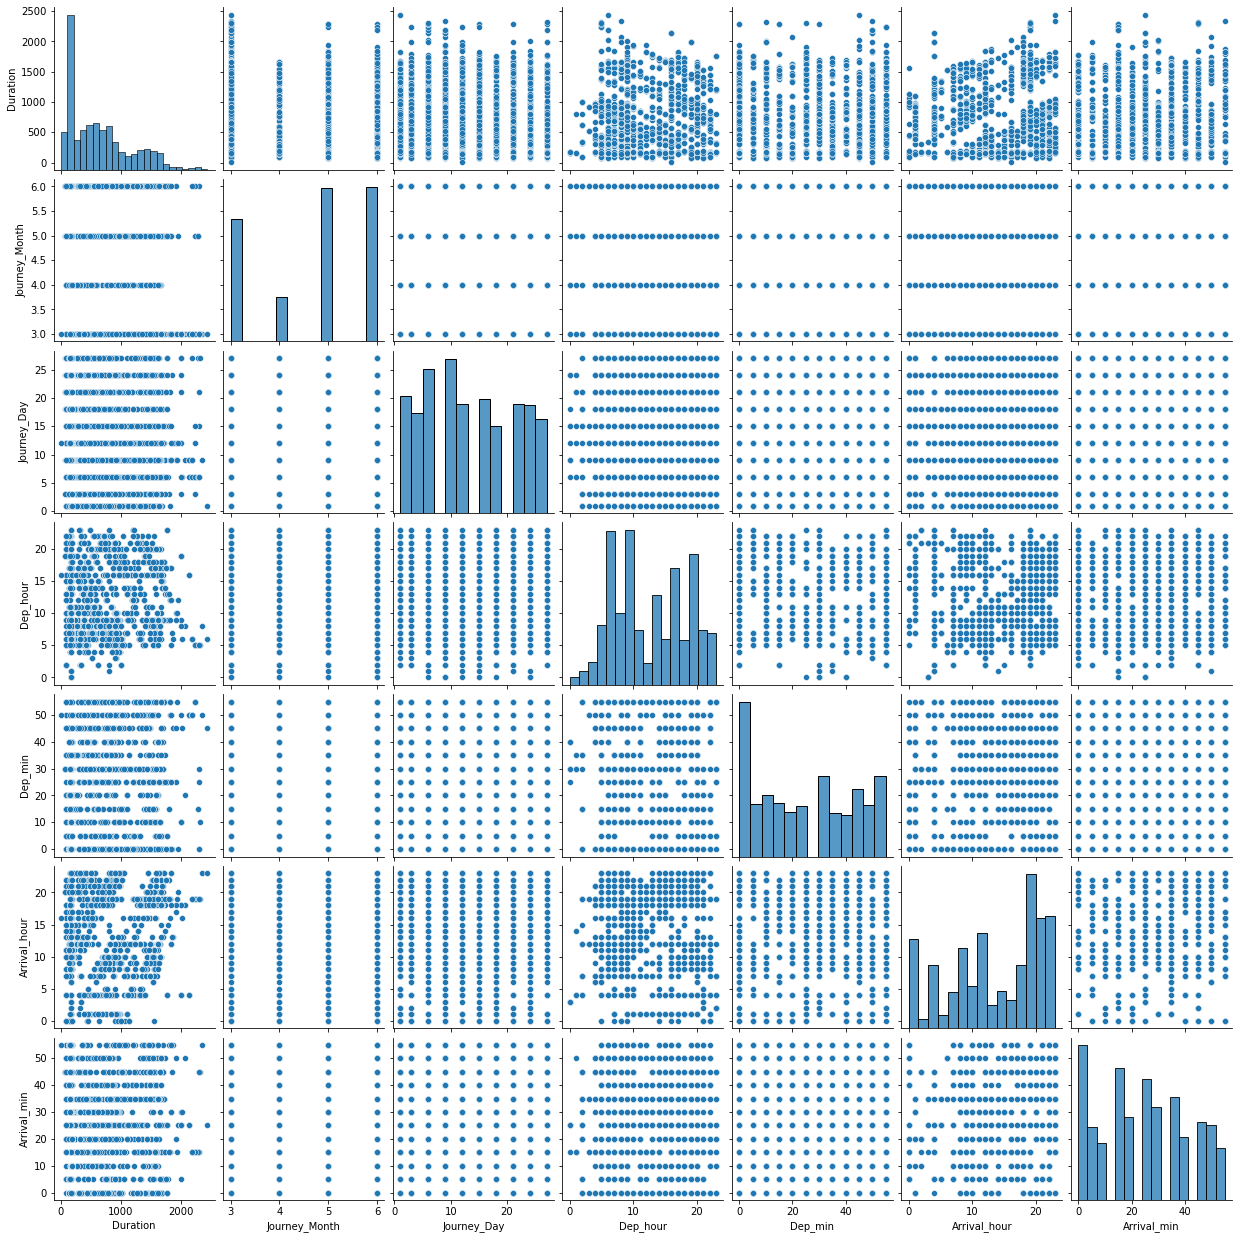

In [60]:
sns.pairplot(df_te)

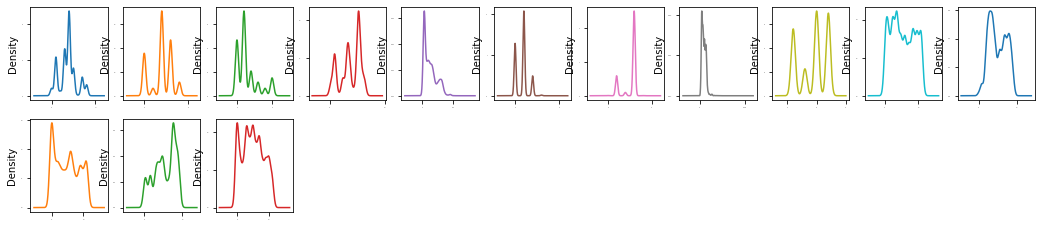

In [2097]:
df_tr.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

Distribution of all columns in Train Dataset

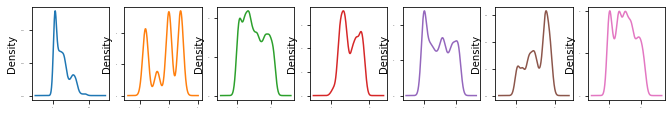

In [61]:
df_te.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

Distribution of all columns in Test Dataset

Checking Outliers of all the columns in Train Dataset:

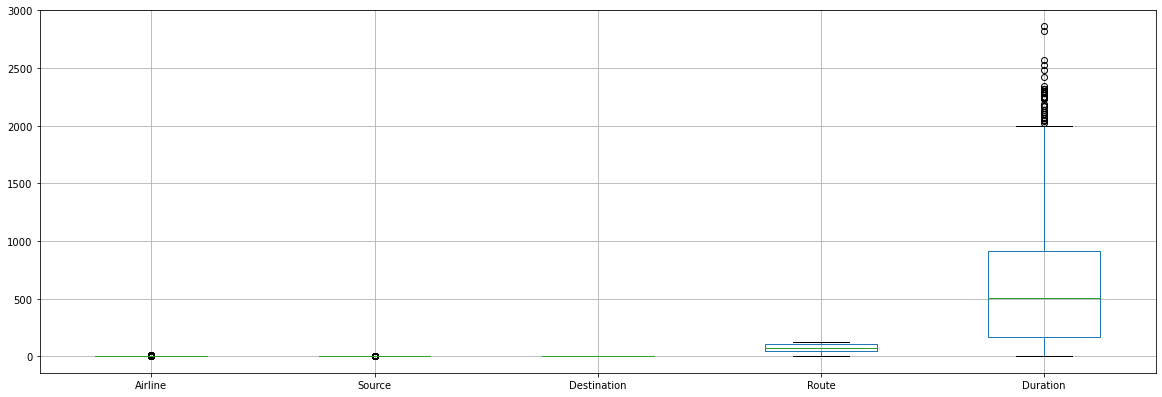

In [2101]:
X.iloc[:,0:5].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

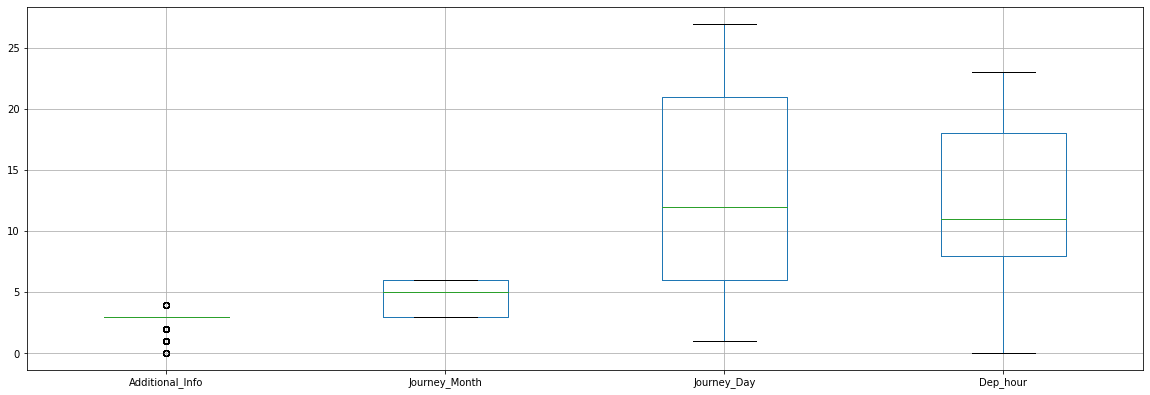

In [2102]:
X.iloc[:,6:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

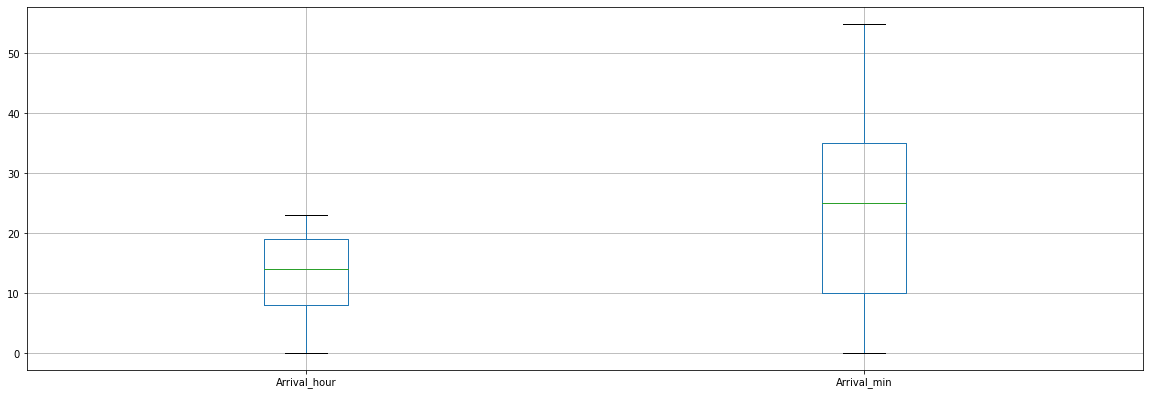

In [2103]:
X.iloc[:,11:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [2074]:
df_te.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,6,24,23,55,2,45


Describe Test dataset

In [75]:
df_tr['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_te['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

Replace the values of Total_Stops in Train and Test dataset

In [2076]:
df_tr["Airline"].value_counts()


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [2077]:
df_tr["Airline"].replace({'Multiple carriers Premium economy':'Other','Jet Airways Business':'Other',
                                'Vistara Premium economy':'Other','Trujet':'Other'},inplace=True)

In [76]:
df_te["Airline"].replace({'Multiple carriers Premium economy':'Other','Jet Airways Business':'Other',
                        'Vistara Premium economy':'Other','Trujet':'Other'},inplace=True)

In [2079]:
df_tr["Additional_Info"].replace({'Change airports':'Other','Business class':'Other','1 Short layover':'Other',
                                     'Red-eye flight':'Other','2 Long layover':'Other',},inplace=True)

In [77]:
df_te["Additional_Info"].replace({'Change airports':'Other','Business class':'Other','1 Short layover':'Other',
                                    'Red-eye flight':'Other','2 Long layover':'Other',},inplace=True)

Hee Replacing vakues of Airline and Additional_Info columns in Train and Test Dataset

In [2081]:
df_tr.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,3,1,16,50,21,35


In [78]:
df_te.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,0,No info,6,24,23,55,2,45


Describe the datasets

Encoding for Train dataset:

In [2082]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2083]:
df_tr['Airline']= le.fit_transform(df_tr['Airline'].values)

In [2084]:
df_tr['Source']= le.fit_transform(df_tr['Source'].values)

In [2085]:
df_tr['Destination']= le.fit_transform(df_tr['Destination'].values)

In [2086]:
df_tr['Route']= le.fit_transform(df_tr['Route'].values)

In [2087]:
df_tr['Additional_Info']= le.fit_transform(df_tr['Additional_Info'].values)

In [2088]:
df_tr.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0,3,3897,3,24,22,20,1,10
1,1,3,0,84,445,2,3,7662,5,1,5,50,13,15
2,4,2,1,118,1140,2,3,13882,6,9,9,25,4,25
3,3,3,0,91,325,1,3,6218,5,12,18,5,23,30
4,3,0,5,29,285,1,3,13302,3,1,16,50,21,35


After converting Categorical values into numeric in Train dataset

Encoding for Test dataset:

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
df_te['Airline']= le.fit_transform(df_te['Airline'].values)

In [81]:
df_te['Source']= le.fit_transform(df_te['Source'].values)

In [82]:
df_te['Destination']= le.fit_transform(df_te['Destination'].values)

In [83]:
df_te['Route']= le.fit_transform(df_te['Route'].values)

In [84]:
df_te['Additional_Info']= le.fit_transform(df_te['Additional_Info'].values)

In [85]:
df_te.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,655,1,3,6,6,17,30,4,25
1,3,3,0,65,240,1,3,5,12,6,20,10,20
2,4,2,1,76,1425,1,1,5,21,19,15,19,0
3,5,2,1,76,780,1,3,5,21,8,0,21,0
4,0,0,2,16,170,0,3,6,24,23,55,2,45


After converting Categorical values into numeric in Test dataset

In [2098]:
X=df_tr.drop("Price",axis=1)
y=df_tr["Price"]

Checking Correlation of Train dataset:

In [1935]:
cor=df_tr.corr()

In [1936]:
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.007601,0.019186,0.013371,-0.148709,-0.197675,-0.152326,-0.012320,0.028988,0.024765,-0.018023,-0.053672,-0.020115,-0.078770
Source,-0.007601,1.000000,-0.589992,0.403884,0.162808,0.194203,-0.042829,0.013796,0.181072,0.005440,0.060218,-0.056609,0.028257,0.021392
Destination,0.019186,-0.589992,1.000000,-0.457559,-0.254243,-0.291763,0.050530,-0.065875,-0.362186,-0.040994,-0.074056,0.128523,-0.044605,0.016351
Route,0.013371,0.403884,-0.457559,1.000000,0.273200,0.441347,0.026808,0.154374,0.236674,0.079747,-0.075188,-0.070978,0.021612,-0.174172
Duration,-0.148709,0.162808,-0.254243,0.273200,1.000000,0.727982,-0.156550,0.501758,0.004874,-0.029810,-0.001285,-0.019225,0.061912,-0.070977
Total_Stops,-0.197675,0.194203,-0.291763,0.441347,0.727982,1.000000,-0.056271,0.602013,0.039003,-0.018937,-0.067523,-0.002695,0.051476,-0.107099
Additional_Info,-0.152326,-0.042829,0.050530,0.026808,-0.156550,-0.056271,1.000000,-0.008538,-0.068991,-0.036757,-0.064638,-0.011442,0.031291,0.046984
Price,-0.012320,0.013796,-0.065875,0.154374,0.501758,0.602013,-0.008538,1.000000,-0.113396,-0.159044,0.005155,-0.024155,0.031023,-0.086163
Journey_Month,0.028988,0.181072,-0.362186,0.236674,0.004874,0.039003,-0.068991,-0.113396,1.000000,-0.038331,0.040406,-0.062636,0.001423,-0.099261
Journey_Day,0.024765,0.005440,-0.040994,0.079747,-0.029810,-0.018937,-0.036757,-0.159044,-0.038331,1.000000,-0.003394,-0.004741,-0.002448,-0.015086


<AxesSubplot:>

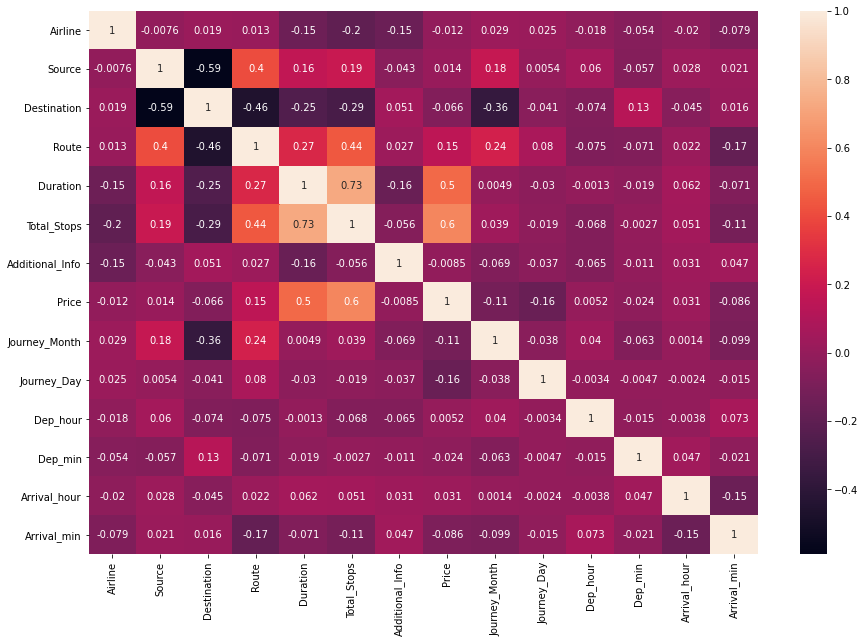

In [1937]:
plt.figure(figsize=(15,10))
sns.heatmap(df_tr.corr(),annot=True)

Checking correlation of all the independent column with target column in Train dataset

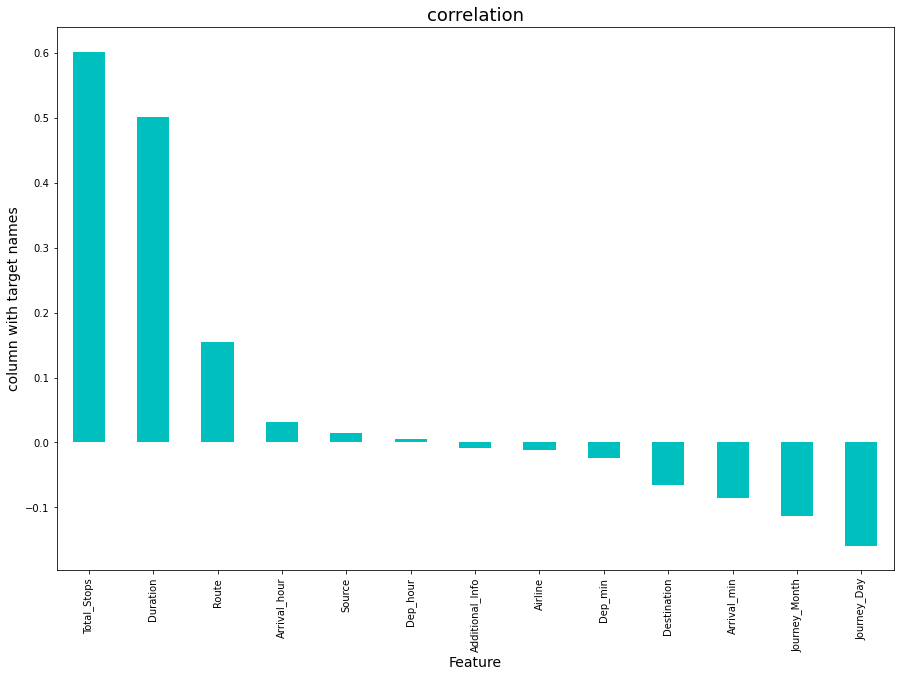

In [1938]:
plt.figure(figsize=(15,10))
df_tr.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Correlation in different way in Train dataset

Checking Correlation of Test dataset:

In [86]:
cor=df_te.corr()

In [87]:
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.034646,0.042814,-0.007500,-0.170057,-0.235710,-0.136836,0.044268,-0.002467,0.026640,-0.049866,-0.018989,-0.093058
Source,-0.034646,1.000000,-0.575119,0.337852,0.149888,0.184885,-0.033734,0.166904,-0.030143,0.058995,-0.062953,0.007048,-0.004978
Destination,0.042814,-0.575119,1.000000,-0.441516,-0.245667,-0.289264,0.038396,-0.348673,-0.015023,-0.053725,0.151377,-0.012942,0.031984
Route,-0.007500,0.337852,-0.441516,1.000000,0.271969,0.447048,0.056012,0.229369,0.048171,-0.133598,-0.043775,0.010718,-0.210004
Duration,-0.170057,0.149888,-0.245667,0.271969,1.000000,0.729332,-0.141028,-0.023337,-0.023531,-0.016267,0.026217,0.053685,-0.073104
Total_Stops,-0.235710,0.184885,-0.289264,0.447048,0.729332,1.000000,-0.045712,0.009650,-0.014139,-0.103841,0.010893,0.041232,-0.111076
Additional_Info,-0.136836,-0.033734,0.038396,0.056012,-0.141028,-0.045712,1.000000,-0.019342,-0.033149,-0.082260,0.011190,0.006050,0.031940
Journey_Month,0.044268,0.166904,-0.348673,0.229369,-0.023337,0.009650,-0.019342,1.000000,-0.019786,0.018846,-0.108170,0.004518,-0.144564
Journey_Day,-0.002467,-0.030143,-0.015023,0.048171,-0.023531,-0.014139,-0.033149,-0.019786,1.000000,-0.024667,-0.012403,0.015589,-0.004990
Dep_hour,0.026640,0.058995,-0.053725,-0.133598,-0.016267,-0.103841,-0.082260,0.018846,-0.024667,1.000000,-0.032762,-0.006750,0.064686


<AxesSubplot:>

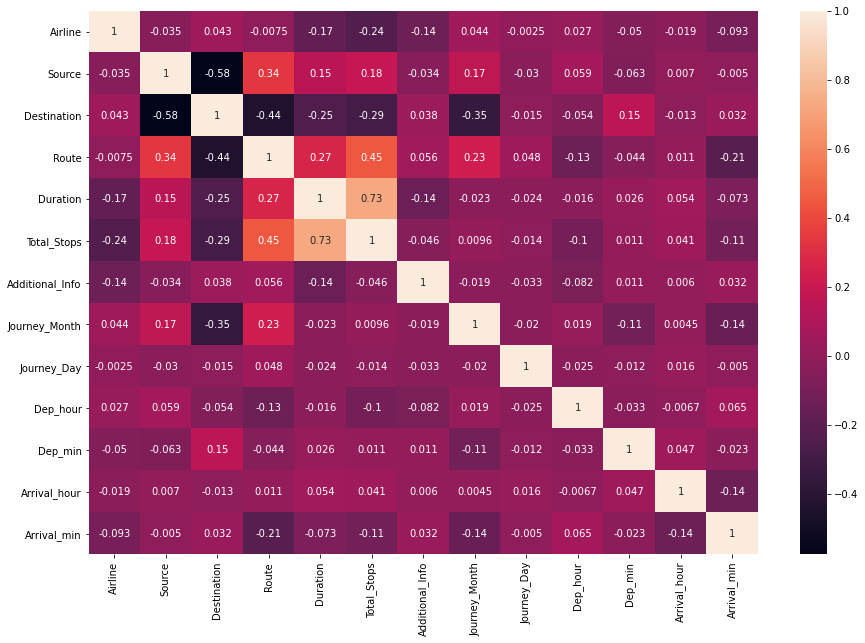

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(df_te.corr(),annot=True)

Checking correlation of all the independent column with target column in Test dataset

In [1940]:
X=df_tr.drop("Price",axis=1)
y=df_tr["Price"]

Use zscore method for data loss for Train Dataset:

In [1941]:
from scipy.stats import zscore
z=np.abs(zscore(df_tr))
new_df_tr=df_tr[(z<3).all(axis=1)]

In [1942]:
new_df_tr.shape   

(10264, 14)

In [1943]:
df_tr.shape

(10462, 14)

In [1856]:
Data_loss=((10462-10264)/10462)*100

In [1857]:
Data_loss

1.8925635633722044

Here 1.89 persent dataloss using zscore in Train dataset

Use IQR technique for data loss:

In [1858]:
Q1=df_tr.quantile(0.25)
Q3=df_tr.quantile(0.75)
IQR=Q3-Q1
df_new=df_tr[~((df_tr<(Q1-1.5*IQR))|(df_tr>(Q3+1.5*IQR))).any(axis=1)]

In [1859]:
df_new.shape

(4116, 14)

Using IQR more dataloss

Checking skewness:

In [1860]:
df_tr.skew()

Airline            0.267279
Source            -0.419669
Destination        1.225081
Route             -0.481865
Duration           0.903973
Total_Stops        0.332309
Additional_Info   -1.494941
Price              1.857490
Journey_Month     -0.377535
Journey_Day        0.124628
Dep_hour           0.108306
Dep_min            0.171301
Arrival_hour      -0.378978
Arrival_min        0.110802
dtype: float64

In [1861]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_trpt=pt.fit_transform(df_tr)
df_tr=pd.DataFrame(df_trpt,columns=df_tr.columns)

In [1862]:
df_tr.skew()

Airline           -0.042465
Source            -0.243947
Destination        0.042804
Route             -0.434321
Duration          -0.038729
Total_Stops       -0.056943
Additional_Info   -0.851461
Price             -0.011043
Journey_Month     -0.212502
Journey_Day       -0.202061
Dep_hour          -0.104852
Dep_min           -0.358886
Arrival_hour      -0.359865
Arrival_min       -0.347625
dtype: float64

Use powertransform to remove skewness in dataset but still some minor skewness is present insome columns but they are categorical columns so ignore it.

Use zscore method for data loss for Test dataset:

In [89]:
from scipy.stats import zscore
z=np.abs(zscore(df_te))
new_df_te=df_te[(z<3).all(axis=1)]

In [90]:
new_df_te.shape   

(2616, 13)

In [91]:
df_te.shape

(2645, 13)

In [93]:
Data_loss=((2645-2616)/2645)*100

In [94]:
Data_loss

1.0964083175803403

Here 1.09 persent dataloss using zscore in Test dataset

Use IQR technique for data loss for Test dataset:

In [95]:
Q1=df_te.quantile(0.25)
Q3=df_te.quantile(0.75)
IQR=Q3-Q1
df_new=df_te[~((df_te<(Q1-1.5*IQR))|(df_te>(Q3+1.5*IQR))).any(axis=1)]

In [96]:
df_new.shape

(1659, 13)

Using IQR more dataloss

Checking skewness:

In [97]:
df_te.skew()

Airline            0.242638
Source            -0.424718
Destination        1.260252
Route             -0.276162
Duration           0.913735
Total_Stops        0.329736
Additional_Info   -1.652285
Journey_Month     -0.400537
Journey_Day        0.201535
Dep_hour           0.089146
Dep_min            0.129932
Arrival_hour      -0.447350
Arrival_min        0.113229
dtype: float64

In [98]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_tept=pt.fit_transform(df_te)
df_te=pd.DataFrame(df_tept,columns=df_te.columns)

In [99]:
df_te.skew()

Airline           -0.051969
Source            -0.239574
Destination        0.039911
Route             -0.318200
Duration          -0.046960
Total_Stops       -0.057996
Additional_Info   -0.893219
Journey_Month     -0.224830
Journey_Day       -0.179332
Dep_hour          -0.107100
Dep_min           -0.372529
Arrival_hour      -0.408681
Arrival_min       -0.354782
dtype: float64

Use powertransform to remove skewness in dataset but still some minor skewness is present insome columns but they are categorical columns so ignore it in Test dataset

Here there are no target variable present in test dataset so use all modelling technique in Train dataset and Use Test dataset to predicted the values of target variable price

Apply MinMax Scaler:

In [1863]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [1864]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [1865]:
from sklearn.model_selection import train_test_split,cross_val_score

In [1866]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Importing Libraryies

In [1867]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

Use different models to select best r2_score and select best model.

In [1868]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1869]:
pred_test=lr.predict(X_test)

In [1870]:
print(r2_score(y_test,pred_test))

0.41827552059242434


In [1871]:
print(r2_score(y_train,lr.predict(X_train)))

0.4510349661022379


In [1872]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [1873]:
parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [1874]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)
test_score=r2_score(y_test,pred_ls)
train_score=r2_score(y_train,ls.predict(X_train))
if abs(train_score - test_score) <= 0.1:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_ls))
    print('R2 score is Train',r2_score(y_train,ls.predict(X_train)))

8
R2 score is Test 0.41827766091816
R2 score is Train 0.4510345104005202


In [1566]:
#for i in range(2,9):
cv=cross_val_score(ls,X,y,cv=i)
cv_mean=cv_score.mean()
print(ls,cv.mean())


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False) 0.44373965830880574


lierRegressor Lasso model r2_score and cross validation score of Train set and Test set

In [1567]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
ri=Ridge()
clf=GridSearchCV(ri,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 10}


In [1568]:
ri=Ridge(alpha=10)
ri.fit(X_train,y_train)
ri.score(X_train,y_train)
pred_ri=ri.predict(X_test)
test_score=r2_score(y_test,pred_ri)
train_score=r2_score(y_train,ri.predict(X_train))
if abs(train_score - test_score) <= 0.2:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_ri))
    print('R2 score is Train',r2_score(y_train,ls.predict(X_train)))

8
R2 score is Test 0.41831302627114475
R2 score is Train 0.45103451062507693


In [1569]:
cv=cross_val_score(ri,X,y,cv=i)
cv_mean=cv_score.mean()
print(ri,cv.mean())

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) 0.44374740555460723


lierRegressor Ridge model r2_score and cross validation score of Train set and Test set

In [1570]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_rf=rf.predict(X_test)
test_score=r2_score(y_test,pred_rf)
train_score=r2_score(y_train,rf.predict(X_train))
if abs(train_score - test_score) <= 0.2:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_rf))
    print('R2 score is Train',r2_score(y_train,rf.predict(X_train)))

8
R2 score is Test 0.9055600360587884
R2 score is Train 0.9778965409531871


In [1571]:
#for i in range(2,9):
rfscore=cross_val_score(rf,X,y,cv=i)
rfc=rfscore.mean()
print('cross cal score:',rfc*100)

cross cal score: 88.35339017251958


RandomForestRegressor model r2_score and cross validation score of Train set and Test set

In [1572]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(X_train,y_train)
sv.score(X_train,y_train)
pred_sv=sv.predict(X_test)
test_score=r2_score(y_test,pred_sv)
train_score=r2_score(y_train,sv.predict(X_train))
if abs(train_score - test_score) <= 0.2:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_sv))
    print('R2 score is Train',r2_score(y_train,sv.predict(X_train)))

8
R2 score is Test 0.13276552730303592
R2 score is Train 0.15343236326706577


In [1573]:
svscore=cross_val_score(sv,X,y,cv=i)
svc=svscore.mean()
print('cross cal score:',svc*100)

cross cal score: 16.1980417022972


SVR model r2_score and cross validation score of Train set and Test set

In [1574]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
pred_dt=dt.predict(X_test)
test_score=r2_score(y_test,pred_dt)
train_score=r2_score(y_train,dt.predict(X_train))
if abs(train_score - test_score) <= 0.2:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_dt))
    print('R2 score is Train',r2_score(y_train,dt.predict(X_train)))

8
R2 score is Test 0.8439618118388651
R2 score is Train 0.9961374650585466


In [1575]:
dtscore=cross_val_score(dt,X,y,cv=i)
dtc=dtscore.mean()
print('cross cal score:',dtc*100)

cross cal score: 78.02691408449721


DecisionTreeRegressor model r2_score and cross validation score of Train set and Test set

In [1576]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsRegressor

In [1577]:
Ad = AdaBoostRegressor()
Ad.fit(X_train,y_train)
Ad.score(X_train,y_train)
pred_Ad=Ad.predict(X_test)
test_score=r2_score(y_test,pred_Ad)
train_score=r2_score(y_train,Ad.predict(X_train))
if abs(train_score - test_score) <= 0.2:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_Ad))
    print('R2 score is Train',r2_score(y_train,Ad.predict(X_train)))

8
R2 score is Test 0.22978741857955443
R2 score is Train 0.19221838426866833


In [1578]:
Adscore=cross_val_score(Ad,X,y,cv=i)
Adc=dtscore.mean()
print('cross cal score:',Adc*100)

cross cal score: 78.02691408449721


AdaBoostRegressor model r2_score and cross validation score of Train set and Test set

In [1579]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
KNN.score(X_train,y_train)
pred_KNN=KNN.predict(X_test)
test_score=r2_score(y_test,pred_KNN)
train_score=r2_score(y_train,KNN.predict(X_train))
if abs(train_score - test_score) <= 0.2:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_KNN))
    print('R2 score is Train',r2_score(y_train,KNN.predict(X_train)))

8
R2 score is Test 0.5490346451343222
R2 score is Train 0.7398298024755081


In [1580]:
KNNscore=cross_val_score(KNN,X,y,cv=i)
KNNc=dtscore.mean()
print('cross cal score:',KNNc*100)

cross cal score: 78.02691408449721


KNeighborsRegressor model r2_score and cross validation score of Train set and Test set

In [1581]:
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB.score(X_train,y_train)
pred_GB=GB.predict(X_test)
test_score=r2_score(y_test,pred_GB)
train_score=r2_score(y_train,GB.predict(X_train))
if abs(train_score - test_score) <= 0.2:
    print(i)
    print('R2 score is Test',r2_score(y_test,pred_GB))
    print('R2 score is Train',r2_score(y_train,GB.predict(X_train)))

8
R2 score is Test 0.8333864153505173
R2 score is Train 0.8338439516461043


In [1582]:
GBscore=cross_val_score(GB,X,y,cv=i)
GBc=dtscore.mean()
print('cross cal score:',GBc*100)

cross cal score: 78.02691408449721


GradientBoostingRegressor model r2_score and cross validation score of Train set and Test set

Here RandomForestRegressor are best and high Accuracy score so apply Hyper parameter tunning on it

In [1583]:
from sklearn.model_selection import GridSearchCV

Import GridsearcgCv

In [1474]:
import numpy as np

In [1475]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion' : ['mse','mae'],
              'max_features': ["auto","log2"]}

Import parameters

Import GridSearchCV library

Intialize:

In [1477]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [1478]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

Best parameter list of RandomForestRegressor

In [1480]:
Final_mod2 = RandomForestRegressor(criterion= 'mse',max_features='log2')
Final_mod2.fit(X_train,y_train)
pred = Final_mod2.predict(X_test)
rf=r2_score(y_test,pred_decision)
print(rfc*100)

88.3301260369943


Finally print best score

In [1482]:
import joblib
joblib.dump(Final_mod2,'flight_price.obj')

['flight_price.obj']

Importing Model

In [1484]:
Final_mod2 = joblib.load('flight_price.obj')
pred = Final_mod2.predict(X_test)

predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':pred})

In [1485]:
flight_price = joblib.load('flight_price.obj')

Loading model

In [1488]:
prices = flight_price.predict(X_train)

In [1489]:
prices

array([4077.36      , 5603.06      , 7757.105     , ..., 7267.34619048,
       7173.986     , 6076.92      ])

Predicted values

In [1490]:
price_list = pd.DataFrame({'Price':prices})

In [1491]:
price_list

,Price
0,4077.36000
1,5603.06000
2,7757.10500
3,9630.69000
4,3850.00000
...,...
8364,2765.11000
8365,6368.72000
8366,7267.34619
8367,7173.98600


Predicted values of Test dataset